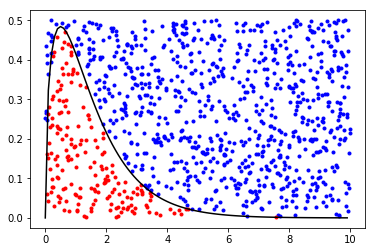

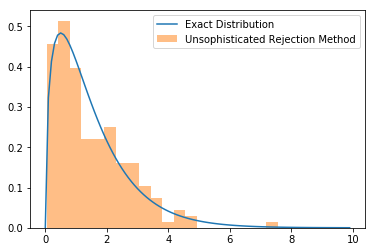

Success Rate is: 0.181


In [51]:
#Lab 9
import matplotlib.pyplot as plt
import numpy as np

#Inefficient Method
n = 1000
success = 0
x = np.arange(0,10,0.1)
unsophisticated_rejection = []

def probDense(x):
    return 2*np.sqrt(x/np.pi)*np.exp(-x)

for i in range(n):
    xValue = 10*np.random.rand()
    yValue = 0.5*np.random.rand()
    
    if yValue < probDense(xValue):
        plt.plot(xValue,yValue,'r.')
        success += 1
        unsophisticated_rejection.append(xValue)
    else:
        plt.plot(xValue,yValue,'b.')

plt.plot(x,probDense(x), color='black')
plt.show()

plt.plot(x,probDense(x), label='Exact Distribution')
plt.hist(unsophisticated_rejection, bins = 20, density = True,\
         alpha = 0.5, label = 'Unsophisticated Rejection Method')
plt.legend()
plt.show()
print("Success Rate is:", success/n)

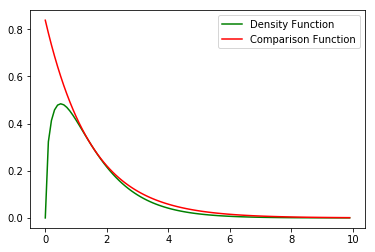

In [55]:
#More efficient method
from numpy import e, pi
import scipy.integrate as integrate
import scipy.special as special

A = 2*np.sqrt(3/2/pi/e)
cutoff = 10

def f(x):
    return A*np.exp(-2*x/3)

def int_fn(x):
    return -1.5*A*np.exp(-2*x/3)+1.5*A

plt.plot(x,probDense(x), color='green', label='Density Function')
plt.plot(x,f(x), color='red', label='Comparison Function')
plt.legend()
plt.show()

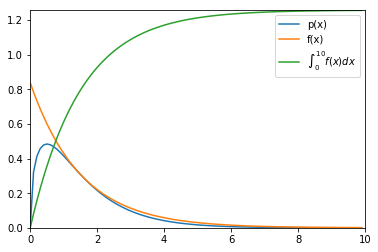

In [61]:
#Plot of all three functions
plt.plot(x, probDense(x), label="p(x)")
plt.plot(x, f(x), label="f(x)")
plt.plot(x, int_fn(x), label=r"$\int_0^{10} f(x)dx$")
plt.xlim(0,cutoff)
plt.ylim(0,int_fn(cutoff))
plt.legend()
plt.show()

Average number of trials:  1.21
Success rate:  0.8264462809917356


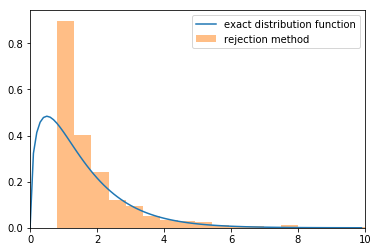

In [76]:
# implementation of the general rejection method
# for the exponential distribution and linear comparison function

counter = 0

def exp_rejection():
    global counter
    # repeat until acceptance
    accept = False
    x0 = 0
    while(accept == False):
        counter += 1
            
        # pick a random point between 0 and the full integral of f(x)
        randomI = int_fn(cutoff)*np.random.rand()

        # get the corresponding x0 value
        x0 = 1/randomI
        
        # pick a random value between 0 and f(x0)
        y0 = f(x0)*np.random.rand()

        # accept or reject
        if y0 < probDense(x0):
            accept = True
    return x0

rejection_data = []
for i in range(n):
    rejection_data = np.append(rejection_data, exp_rejection())

print("Average number of trials: ", counter/n)
print("Success rate: ", n/counter)
    
# compare results
plt.plot(x, probDense(x), label = 'exact distribution function')
plt.hist(rejection_data, bins = 20, density = True,\
        alpha = 0.5, label = 'rejection method')
plt.xlim(0,cutoff)
plt.legend()
plt.show()

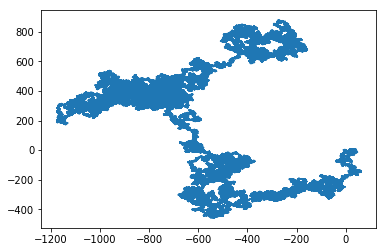

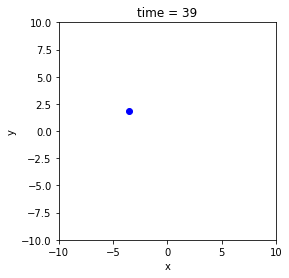

In [77]:
%matplotlib inline
import numpy as np
import numpy.random as nprand
import matplotlib.pyplot as plt
import matplotlib.animation as animation

nwalkers=1
nsteps= 1000000

steparr=nprand.rand(nwalkers,nsteps,2)-0.5  # all nwalk*nstep*ndim random numbers
xsteps=np.zeros((nwalkers,nsteps))          # cumulative x positions
ysteps=np.zeros((nwalkers,nsteps))          # cumulative y positions

for i in range(nwalkers):          # loop over walkers
    for j in range(1,nsteps):      # loop over steps all start at 0,0
        r=np.sqrt(steparr[i,j,0]**2 + steparr[i,j,1]**2)   # normalize step size to 1
        xsteps[i,j]=xsteps[i,j-1] + steparr[i,j,0]/r
        ysteps[i,j]=ysteps[i,j-1] + steparr[i,j,1]/r

for k in range(nwalkers):
    plt.plot(xsteps[k,:],ysteps[k,:])
    
#Stuff for animation
fig = plt.figure()
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.gca().set_aspect('equal', adjustable='box')

    
def animate(i):
      
    if i > 0:
        plt.cla()
        plt.xlim(-10,10)
        plt.ylim(-10,10)
        plt.scatter(xsteps[0,i],ysteps[0,i],c='b')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('time = %d' %i)
    
simulation = animation.FuncAnimation(fig, animate, frames = 40, repeat = False)

from IPython.display import HTML
HTML(simulation.to_jshtml())